In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [2]:
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])

In [3]:
L = 200; M = 100; N=60; O=30

W1 = tf.Variable( tf.truncated_normal( [784,L],stddev=0.1 ) )
W2 = tf.Variable( tf.truncated_normal( [L,M],stddev=0.1 ) )
W3 = tf.Variable( tf.truncated_normal( [M,N],stddev=0.1 ) )
W4 = tf.Variable( tf.truncated_normal( [N,O],stddev=0.1 ) )
W5 = tf.Variable( tf.truncated_normal( [O,10],stddev=0.1 ) )

B1 = tf.Variable(tf.zeros([L]))
B2 = tf.Variable(tf.zeros([M]))
B3 = tf.Variable(tf.zeros([N]))
B4 = tf.Variable(tf.zeros([O]))
B5 = tf.Variable(tf.zeros([10]))

In [4]:
Y1 = tf.nn.sigmoid(tf.matmul(x,W1)+B1)
Y2 = tf.nn.sigmoid(tf.matmul(Y1,W2)+B2)
Y3 = tf.nn.sigmoid(tf.matmul(Y2,W3)+B3)
Y4 = tf.nn.sigmoid(tf.matmul(Y3,W4)+B4)
logits = tf.matmul(Y4,W5)+B5
y_pred = tf.nn.softmax(logits)

In [5]:
cross_entropy = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=logits,
                                                        labels=y) )
#optimizer = tf.train.GradientDescentOptimizer(0.05)
optimizer = tf.train.AdamOptimizer()
train_step = optimizer.minimize(cross_entropy) 

# 1# For Beginner 
We find the accuracy for testing data

In [31]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
correct_pred = tf.equal(tf.argmax(y_pred,1),tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))

#for _ in range(10):
for _ in range(10000):
    batch_xs, batch_ys = data.train.next_batch(100)
    training_data = {x: batch_xs, y: batch_ys}
    sess.run(train_step, feed_dict=training_data)
print(sess.run(accuracy,feed_dict={x:data.test.images,y:data.test.labels}))


0.9722


# 2# Better visualization 
Here we can see the improvement of accuray and cross_entropy as we train more data 

In [7]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
correct_pred = tf.equal(tf.argmax(y,1),tf.argmax(y_pred,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))

# train data
training_acc = []
training_ce = []
test_acc = []
test_ce = []
import numpy as np
for i in range(10000):
    batch_xs, batch_ys = data.train.next_batch(100)
    training_data = {x: batch_xs, y: batch_ys}
    sess.run(train_step, feed_dict=training_data)

    if  np.remainder([i], 100) == 0:
        acc,ce = sess.run([accuracy,cross_entropy], feed_dict=training_data)
        training_acc.append(acc)
        training_ce.append(ce)
        
        test_data = {x:data.test.images,y:data.test.labels}
        acc2,ce2 = sess.run([accuracy,cross_entropy],feed_dict=test_data)
        test_acc.append(acc2)
        test_ce.append(ce2)

In [9]:
test_data = {x:data.test.images,y:data.test.labels}
test_accuracy,test_crossentropy = sess.run([accuracy,cross_entropy],feed_dict=test_data)
print('Testing Accuracy:\t',test_accuracy)
print('Testing Cross Entropy:\t',test_crossentropy)

Testing Accuracy:	 0.9722
Testing Cross Entropy:	 0.121189


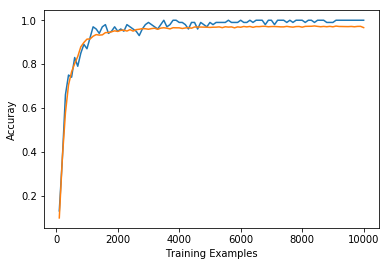

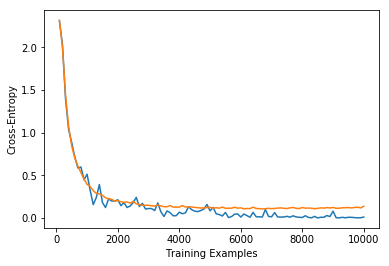

In [30]:
import matplotlib.pyplot as plt
l = np.arange (100,10001,100)
plt.plot(l,training_acc)
plt.plot(l,test_acc)
plt.xlabel('Training Examples')
plt.ylabel('Accuray')
plt.show()

plt.plot(l,training_ce)
plt.plot(l,test_ce)
plt.xlabel('Training Examples')
plt.ylabel('Cross-Entropy')
plt.show()

